# Module 4: Network Evolution


*The notes in this module use NetworkX version 1.11. I haven't tested any of the code on NetworkX version 2.*

## About this Module

In Module Four, you'll explore the evolution of networks over time, including the different models that generate networks with realistic features, such as the Preferential Attachment Model and Small World Networks. You will also explore the link prediction problem, where you will learn useful features that can predict whether a pair of disconnected nodes will be connected in the future. In the assignment, you will be challenged to identify which model generated a given network. Additionally, you will have the opportunity to combine different concepts of the course by predicting the salary, position, and future connections of the employees of a company using their logs of email exchanges.

## Learning Objectives

* Define the degree distribution of a network and use networkX to visualize it.
* Identify the typical properties of real, large networks such as power law like degree distribution, high clustering, and small average shortest paths.
* Describe the mechanics of the Preferential Attachment Model and identify the properties of the networks it generates.
* Describe the mechanics of the Small World Model and identify the properties of the networks it generates.
* Identify and describe several network measures that can be used for link prediction.
* Use NetworkX to create node pair features that are predictive of new edges.
* Use NetworkX to create node features that are predictive of node attributes in a real world setting.

## Lecture 1: Preferential Attachment Model

### Degree distributons

The **degree distribution** of a graph is the probability distribution of the edges over the entire network.



In [1]:
# %pprint       # turns ON/OFF output pretty printing

import matplotlib
%matplotlib inline

import networkx as nx

Let's load the example graph that tha instructor is using *(see lecture video time 1:12)*:

In [5]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'G'), ('A', 'H'),
                  ('B', 'C'), 
                  ('C', 'E'), ('C', 'D'),
                  ('D', 'F'), 
                  ('F', 'G'), ('F', 'I'),
                  ('G', 'H'), ('G', 'I'),
                 ])

We can see the degrees match the ones shown in the lecture video:

In [6]:
G.degree()

{'A': 3, 'B': 2, 'G': 4, 'H': 2, 'C': 3, 'E': 1, 'D': 2, 'F': 3, 'I': 2}

The degree distribution, $P(k)$, of this example network is: $ P(1) = \frac{1}{9} , P(2) = \frac{4}{9}, P(3) = \frac{1}{3} , P(4) = \frac{1}{9} $

#### How to calculate the degree distribution for any network:

In [31]:
from itertools import groupby

N = G.number_of_nodes()

degrees = G.degree()

uniq_deg = sorted(set(degrees.values()))

# teacher's solution is costly O(n^2), because of the list.count()
histogram = [list(degrees.values()).count(d) / N for d in uniq_deg]

# my solution is O(NlogN) but it does take more memory
sorted_deg = sorted(degrees.values())
my_histogram = [len(list(g)) / N for e, g in groupby(sorted_deg)]

Now we can plot the histogram:

Text(0,0.5,'Fraction of nodes')

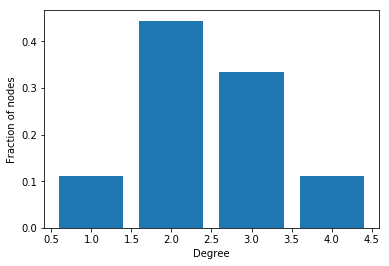

In [32]:
import matplotlib.pyplot as plt

plt.bar(uniq_deg, my_histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of nodes')

#### In-degree distributions

Same logic applies, just use the funtion `G.in_degree()`

#### Degree distribution in real networks

*(See lecture video time 3:05 to see 3 examples of degree distribution for real networks)*

Degree distributions tend to look as a straight line on a log-log scale. 

They obey the **power law**: $ P(k) = C k^{-\alpha} $ , where $\alpha$ and $C$ are constants.

Most of the nodes have very small degree, but a few nodes accumulate very large degree.

**Question**: 

Can we come up with a generative model that reproduce the power law property in the degree distribution of the network?

### Preferential Attachment Model: Generative model to reproduce the power law degree distribution

In order to understand the properties of networks, we want to create a generative model that, from simple rules, can generate artificial networks with the same properties we observe in real networks (power law degree distribution).

The Preferential Attachment Model is one of the models that produce networks with realistic properties.

##### Rules of the Preferential Attachment Model:

* Start with 2 nodes connected by an edge.


* At each iteration add a new node with one edge connecting to an existing node.


* Chose the node to connect at random to with probability proportional to each node's degree.


* The probability of connecting to a node $u$ of degree $k_u$ is: 

$$\frac{k_u}{\sum_j k_j}$$

##### Convergence to a power law distribution

It can be proven that the preferential Attachment Model always gives rise to a Power law degree distribution:

As the number of nodes increases, the *degree distribution* of a network under the *Preferential Attachment Model* approaches the power law: $ P(k) = C k^{-3} $ , where $C$ is a constant.

#### Preferential Attachment Model in NetworkX

We can use the function `barabasi_albert_graph(n,m)`, which returns a network with n nodes. Each new nodes attaches to m existing nodes according to the Preferential Attachment Model rules.

Let's create a network with the Preferential Attachment Model with 1 million nodes and $m=1$ (every node attaches to a single existing node):

In [33]:
G = nx.barabasi_albert_graph(1000000, 1)

Now let's calculate the degree distribution the same way as before:

In [34]:
N = G.number_of_nodes()

degrees = G.degree()

uniq_deg = sorted(set(degrees.values()))

# teacher's solution is costly O(n^2), because of the list.count()
# histogram = [list(degrees.values()).count(d) / N for d in uniq_deg]

# my solution is O(NlogN) but it does take more memory
sorted_deg = sorted(degrees.values())
my_histogram = [len(list(g)) / N for e, g in groupby(sorted_deg)]

Now let's plot the degree distribution as before, only now using a scatter plot with log-log axis scales:

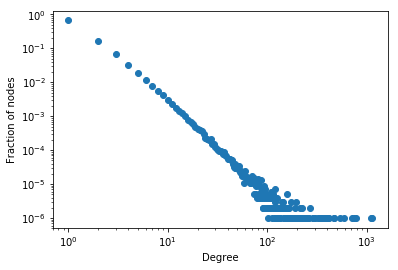

In [36]:
plt.plot(uniq_deg, my_histogram, 'o')
plt.xlabel('Degree')
plt.ylabel('Fraction of nodes')

plt.xscale('log')
plt.yscale('log')

### Summary

* The degree distribution of a graph is the probability distribution of the degrees over the entire network.


* Many real networks have a degree distribution that looks like a power law: $ P(k) = C k^{-\alpha} $ , where $\alpha$ and $C$ are constants.


* Models of network generation allow us to identify mechanisms that give rise to observed patterns in real data.


* The Preferential Attachment Model produces networks with a power law degree distribution.


* In networkx use `nx.barabasi_albert_graph(n, m)` to construct a n-node Preferential Attachment network, where each new node attaches to m existing nodes.

----

## Power Laws and Rich-Get-Richer Phenomena (optional reading)

Read Chapter 18 from "Networks, Crowds, and Markets: Reasoning about a Highly Connected World" By David Easley and Jon Kleinberg. Cambridge University Press, 2010 for an interesting read on Power Laws and Rich-Get-Richer phenomena such as the preferential attachment model.

http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch18.pdf

----

## Lecture 2: Small World Networks

There is this idea which suggests that the world is small, in the sense that we are all connected by very short paths between each other.



#### Milgram Small world experiment

Set up (1960s):

* 296 randomly chosen "starters" asked to forward a letter to a "target" person.

* Target was a stock broker in Boston.

* Instructions for starters:
    - Send letter to target if you know him.
    - If you do not know target, send letter (and instructions) to someone you know, who is more likely to know the target.
    
* Some information about the target, such as city and occupation, was provided.


**Results**: *(see video lecture time 1:37 for a figure with the chain length distribution)*

* 64 out of 296 letters reached the target.

* Median chain length was 6 (consistent with the phrase "six degrees of separation").



#### More resent data:

1. Leskovec and Horvitz, 2008:  *(see video lecture time 3:48)*

    - Nodes: 240 million users of Microsoft Instant Messenger.
    - Edges: Users engaged in two-way communication over a one-month period.
    - Estimated median path length: 7
    - Average Clustering Coefficient: 0.13


2. Backstrom et al, 2012: *(see video lecture time 4:19)*
 
     - Facebook data: studied variations over time and global vs regional.
     - Average path length in 2008 was 5.28, and in 2011 it was 4.74.
     - Paths are even shorter if network restricted to US only.
     - High Average Clustering Coefficient (decreases with degree).

#### What the experimental evidence shows:

Experimental evidence tell us that real networks, with millions of people, exhibit some surprising properties:

1. Average shortest path between pairs of nodes is very small.

2. High average Clustering Coefficient.


*Note: Recall from Module 2 that the **Local Clustering Coefficiant** is the fraction of pairs of node's friends that are fiends with each other. (Roughly, it measures if there are a lot of "triangles" formed).*

**Question**: 

Can we come up with a generative model that reproduces these two properties: small Path Lengths and high Clustering Coeff?

#### Path length and clustering for the Preferential Attachment Model

Can the Preferential Attachment Model reproduce these two properties: small Path Lengths and high Clustering Coeff?

Let's create a Preferential Attachment Model graph in networkx:

In [43]:
G = nx.barabasi_albert_graph(10000, 4)

The average clustering is too small:

In [44]:
nx.average_clustering(G)

0.005944583123543594

The average shortest path length seem to be in line with the experimental evidence:

In [45]:
nx.average_shortest_path_length(G)

3.902908490849085

**Avg Clustering and Path length variation as a factor of the number of nodes (n) and number of edges per new node (m) in the Preferential Attachment Model:**

*See video lecture time 8:09 for the plots showing how the avg clustering coeff and avg shortest path length change for different values of m*

Small average shortest paths: high degree nodes act as hubs and connect many pairs of nodes. This is in accordance with the real data.

Clustering Coefficient get smaller and smaller as n increases, no matter what m is chosen. This is **not in accordance with the real data**.

### Small World Model

**Motivation**: We need a generative model that can create networks with high clustering coefficient and small average shortest path (because many real world networks exhibit these properties).


**Small World Model**:

* Start with a ring of $n$ nodes, where each node is connected to its $k$ nearest neighbors ($k$ is a parameter to fix).

* Fix a parameter $ p \in [0, 1] $.

* For each edge $(u, v)$: with probability $p$ select a node $w$ at random and rewire the edge $(u, v)$ to $(u, w)$.



*(See lecture video time 10:15 for an example of generating a Small World Model network with k=2, p=0.4)*

*(See lecture video time 12:12 for an illustration from Watts and Strogratz, 1999, that shows the effect of increasing p on the networks generated by the Small World Model)*

#### Clustering and shortest length behavior in the Small World Model

The average clustering coefficient and shortest path length of a Small World network depends on paramenters $k$ and $p$:

As p increases from 0 to 0.1:
- average shortest path decreases rapidly.
- average clustering coefficient decreases slowly.


For example: an instance of a network with 1000 nodes, k=6 and p=0.004 has:
* 8.99 average shortest path.
* 0.53 average clustering coefficient.

*(see lecture video time 15:12 for the plots of Avg clustering and shortest path as a function of p, for several values of k)*

#### Small World Model in NetworkX

The function `nx.watts_strogatz_graph(n, k, p)` returns a small world network with $n$ nodes, starting with a ring lattice with each node connected to its $k$ nearest neighbors, and rewiring probability of $p$. 

#### Degree distribution in Small World Models

Let's use the same logic we used before to compute the degree distribution:

In [91]:
n, k, p = 1000, 6, 0.04  # parameter of the Small World Model

G = nx.watts_strogatz_graph(n, k, p)

N = G.number_of_nodes()

In [92]:
degrees = G.degree()

degree_values = sorted(set(degrees.values()))  # unique and sorted degrees 
sorted_degrees = sorted(degrees.values())      # all degrees (with repeats) sorted

from itertools import groupby

histogram = [len(list(g))/N for _, g in groupby(sorted_degrees)]

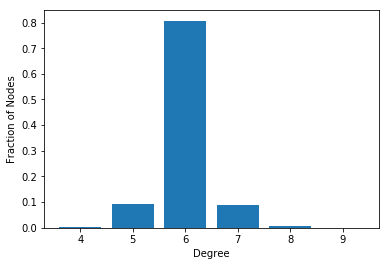

In [93]:
plt.bar(degree_values, histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

We can see that most nodes have degree 6

#### The Small World Model fails on  degree distribution (no power law)

**Question**: Is the degree distribution of small world network a power law distribution?


**Answer**: No


The degree distribution of small world network is **not a power law** because the degree of most nodes lie in the middle (as we can see in the histogram).

The Small World Model **correctly captures** two properties: 
- high clustering coefficient
- small average shortest path

but **fails to capture**:
- power law degree distribution



**In contrast**, the Preferential Attachment Model gets right the power law degree distribution, and the small avg shortes path.

#### Variants of Small Network Model in NetworkX

Variants in networkx:

1. Connected Watts Strogatz (connected small world):

    * Small networks can be disconnected, which is sometimes undesirable.

    * `nx.connected_watts_strogatz_graph(n, k, p, t)` construct the network several times (at most $t$ times), until it finds a connected small world network (or raise a failure if tried $t+1$ times) 
    

2. Newman-Watts-Strogatz:

    * `nx.newman_watts_strogatz_graph(n, k, p)` runs a model similar to the Small World Model, but instead of rewiring edges, new edges are added with probability $p$.

######  Example of variation 1: connected small world

In [96]:
n, k, p = 1000, 6, 0.04  # parameter of the Small World Model
t = 1000 # number or attempts to find a connected network

G = nx.connected_watts_strogatz_graph(n, k, p, t)

######  Example of variation 2:

In [97]:
G = nx.newman_watts_strogatz_graph(n, k, p)  # variation 2

### Summary

* Real social networks appear to have small shortest path between nodes and high clustering coefficient.


* The preferential attachment model produces networks with small shortest path but very small clustering coefficient.


* The Small World Model starts with a ring lattice with nodes connected to its $k$ nearest neighbors (high local clustering), and then rewires edges with probability $p$.


* For small values of p, small world networks have small average shortest path and high clustering coefficient, matching what we observe in real networks.


* However, the degree distribution or a small world network is not a power law.


* On networkx use function `nx.watts_strogatz_graph(n, k, p)` (and other variants) to generate small world networks.

## Lecture 3: Link prediction

What new edges are likely to form in a network?

More specificly let's formulate the problemin this way: Given a pair of nodes, how to assess if they are likely to connect in the future?

In this lecture we go over 7 different measures that may help to assess if a pair of nodes is likely to form a connection in the future.


*Note: Recall we talked about **triadic closure**, which is the tendency for people who share a connection to become connected*

Let's load the example graph that tha instructor is using *(see lecture video time 1:07)*:

In [165]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'D'), ('A', 'E'),
                  ('B', 'C'), ('B', 'D'), 
                  ('C', 'D'), ('C', 'F'),
                  ('E', 'F'), ('E', 'G'), 
                  ('F', 'G'),
                  ('G', 'H'), ('G', 'I'),
                 ])

### Measure I: Common neighbors

The number of common neighbors of nodes $X$ and $Y$ is:

$$ \text{comm_neigh}(X, Y) = \left\vert N(X) \cap N(Y) \right\vert $$

where $N(X)$ is the set of neighbors of node $X$

So, in our example graph: 

$ \text{comm_neigh}(A, C) = \left\vert \left\{ B, D \right\} \right\vert = 2 $ , because nodes $A$ and $C$ only have $B$ and $D$ as common neighbors.

*(see lecture video time 2:19)*

#### Common neighbors in networkx

In networkx you can use the function `nx.common_neighbors(G, n1, n2)` to obtain a generator that produces all the common neighbors of the nodes n1 and n2. 

For example:

In [166]:
gen = nx.common_neighbors(G, 'A', 'C')
list(gen)

['B', 'D']

A usefull networkx function is `nx.non_edges(G)`, which returns all pair of nodes in the graph that are not already connected (do not share an edge):

In [167]:
gen = nx.non_edges(G)  # all pair of nodes that do not share an edge

print(list(gen))

[('G', 'A'), ('G', 'D'), ('G', 'B'), ('G', 'C'), ('F', 'A'), ('F', 'I'), ('F', 'H'), ('F', 'D'), ('F', 'B'), ('C', 'H'), ('C', 'A'), ('C', 'E'), ('C', 'I'), ('A', 'H'), ('A', 'I'), ('I', 'H'), ('I', 'D'), ('I', 'E'), ('I', 'B'), ('H', 'D'), ('H', 'E'), ('H', 'B'), ('D', 'E'), ('E', 'B')]


Now let's count how many common neighbor each pair of nodes has (only including nodes that do not share the same edge):

In [168]:
common_neigh = [(n1, n2, len(list(nx.common_neighbors(G, n1, n2))))  for n1, n2 in nx.non_edges(G)]

In [169]:
from operator import itemgetter
common_neigh_ordered = sorted(common_neigh, key=itemgetter(2), reverse=True)

common_neigh_ordered

[('C', 'A', 2),
 ('G', 'A', 1),
 ('G', 'C', 1),
 ('F', 'A', 1),
 ('F', 'I', 1),
 ('F', 'H', 1),
 ('F', 'D', 1),
 ('F', 'B', 1),
 ('C', 'E', 1),
 ('I', 'H', 1),
 ('I', 'E', 1),
 ('H', 'E', 1),
 ('D', 'E', 1),
 ('E', 'B', 1),
 ('G', 'D', 0),
 ('G', 'B', 0),
 ('C', 'H', 0),
 ('C', 'I', 0),
 ('A', 'H', 0),
 ('A', 'I', 0),
 ('I', 'D', 0),
 ('I', 'B', 0),
 ('H', 'D', 0),
 ('H', 'B', 0)]

So, according to this measure, the pair (A, C) is the most likely to form a new connection.

### Measure 2: Jaccard Coefficient

Number of common neighbors normalized by the total number of neighbors.

The Jaccard coefficient of nodes X, Y is:

$$ \text{jacc_coeff}(X, Y) =  \frac{\left\vert N(X) \cap N(Y) \right\vert}{\left\vert N(X) \cup N(Y) \right\vert}  $$

where $N(X)$ is the set of neighbors of node $X$

So, in our example graph, for nodes $A, C$:


$$ \text{jacc_coeff}(A, C) =  \frac{\left\vert \{B, D\} \right\vert}{\left\vert \{B, D, E, F\} \right\vert} = \frac{2}{4} = \frac{1}{2} $$


*(see lecture video time 4:20)*

#### Jaccard Coefficient in NetworkX

In networkx you can use the function `nx.jaccard_coefficient(G)` to obtain a generator that outputs tuples with the 2 nodes and their Jaccard Coefficient, importantly it only includes pairs of nodes that are not already connected *(so, no need to use the function non_edges(G) as we did before)*.

In [181]:
L = list(nx.jaccard_coefficient(G))

In [182]:
L.sort(key=itemgetter(2), reverse=True)
L

[('I', 'H', 1.0),
 ('C', 'A', 0.5),
 ('F', 'I', 0.3333333333333333),
 ('F', 'H', 0.3333333333333333),
 ('I', 'E', 0.3333333333333333),
 ('H', 'E', 0.3333333333333333),
 ('F', 'A', 0.2),
 ('F', 'D', 0.2),
 ('F', 'B', 0.2),
 ('C', 'E', 0.2),
 ('D', 'E', 0.2),
 ('E', 'B', 0.2),
 ('G', 'A', 0.16666666666666666),
 ('G', 'C', 0.16666666666666666),
 ('G', 'D', 0.0),
 ('G', 'B', 0.0),
 ('C', 'H', 0.0),
 ('C', 'I', 0.0),
 ('A', 'H', 0.0),
 ('A', 'I', 0.0),
 ('I', 'D', 0.0),
 ('I', 'B', 0.0),
 ('H', 'D', 0.0),
 ('H', 'B', 0.0)]

So, according to this measure, the pair (I, H) is the most likely to form a new connection, while (A, C) is less likely. 

Why?

Because I and H are connected to a single neighbor, so this connection is more relevant. While A and C are both connected to many more nodes that they do not share as common neighbors.

### Measure 3: Resource Allocation Index

Fraction of a resource that a node can send to another through their common neighbors.


*Similar to the distribution of a radioactive marked fluid in a water pipe network*


* Consider the initial node as a "source" attempting to send a "resource" to a destination node through all paths that lead to it (pipes).


* Consider common neighbor nodes as dumb pipe hubs that just distribute in equal parts whatever resource flow they take in (they "emanate" the resource in equal parts through all the edges)  

The Resource Allocation index of nodes $X$ and $Y$ is


$$ \text{res_alloc}(X, Y) = \sum_{u \in N(X) \cap N(Y)} \frac{1}{ \left\vert N(u) \right\vert } $$

where:
- $N(u)$ is the set of all the neighbors of node u.

- $ \left\vert N(u) \right\vert = d_u $ is the size of the set neighbors (a.k.a. the degree of node u).

So, in our example graph, for nodes $A, C$:


$$ \text{res_alloc}(A, C) =  \frac{1}{3} + \frac{1}{3} = \frac{2}{3} $$


*(see lecture video time 7:40)*

#### Resource Allocation in NetworkX

In networkx you can use the function `nx.resource_allocation_index(G)` to obtain a generator that outputs tuples with the 2 nodes and their resource allocation index. Importantly, it only includes pairs of nodes that are not already connected *(so, no need to use the function non_edges(G) as we did before)*. 

In [183]:
L = list(nx.resource_allocation_index(G))

In [184]:
L.sort(key=itemgetter(2), reverse=True)
L

[('C', 'A', 0.6666666666666666),
 ('G', 'A', 0.3333333333333333),
 ('G', 'C', 0.3333333333333333),
 ('F', 'A', 0.3333333333333333),
 ('F', 'D', 0.3333333333333333),
 ('F', 'B', 0.3333333333333333),
 ('C', 'E', 0.3333333333333333),
 ('D', 'E', 0.3333333333333333),
 ('E', 'B', 0.3333333333333333),
 ('F', 'I', 0.25),
 ('F', 'H', 0.25),
 ('I', 'H', 0.25),
 ('I', 'E', 0.25),
 ('H', 'E', 0.25),
 ('G', 'D', 0),
 ('G', 'B', 0),
 ('C', 'H', 0),
 ('C', 'I', 0),
 ('A', 'H', 0),
 ('A', 'I', 0),
 ('I', 'D', 0),
 ('I', 'B', 0),
 ('H', 'D', 0),
 ('H', 'B', 0)]

So, according to this measure, the pair (A, C) is the most likely to form a new connection.

Also notice that (A, G) has higher score than (I, H), this is because A and G are connected through a node with degree 3 (node E); while H and I are connected through a node with degree 4 (node G). 


### Measure 4: Adamic-Adar Index

Similar to the resource allocation index, but with $log(d_u)$ in the denominator.

The Adamic-Adar index of nodes $X$ and $Y$ is

$$ \text{adamic_adar}(X, Y) = \sum_{u \in N(X) \cap N(Y)} \frac{1}{ log( \left\vert N(u) \right\vert ) } $$

where:
- $N(u)$ is the set of all the neighbors of node u.

- $ \left\vert N(u) \right\vert = d_u $ is the size of the set neighbors (a.k.a. the degree of node u).

So, in our example graph, for nodes $A, C$:


$$ \text{adamic_adar}(A, C) =  \frac{1}{log(3)} + \frac{1}{log(3)} = 1.82 $$


*(see lecture video time 8:50)*

#### Adamic-Adar index in NetworkX

In networkx you can use the function `nx.adamic_adar_index(G)` to obtain a generator that outputs tuples with the 2 nodes and their Adamic-Adar Index. Importantly, it only includes pairs of nodes that are not already connected *(so, no need to use the function non_edges(G) as we did before)*.

In [185]:
L = list(nx.adamic_adar_index(G))

In [186]:
L.sort(key=itemgetter(2), reverse=True)
L

[('C', 'A', 1.8204784532536746),
 ('G', 'A', 0.9102392266268373),
 ('G', 'C', 0.9102392266268373),
 ('F', 'A', 0.9102392266268373),
 ('F', 'D', 0.9102392266268373),
 ('F', 'B', 0.9102392266268373),
 ('C', 'E', 0.9102392266268373),
 ('D', 'E', 0.9102392266268373),
 ('E', 'B', 0.9102392266268373),
 ('F', 'I', 0.7213475204444817),
 ('F', 'H', 0.7213475204444817),
 ('I', 'H', 0.7213475204444817),
 ('I', 'E', 0.7213475204444817),
 ('H', 'E', 0.7213475204444817),
 ('G', 'D', 0),
 ('G', 'B', 0),
 ('C', 'H', 0),
 ('C', 'I', 0),
 ('A', 'H', 0),
 ('A', 'I', 0),
 ('I', 'D', 0),
 ('I', 'B', 0),
 ('H', 'D', 0),
 ('H', 'B', 0)]

The result order is very similar to the Resource Allocation index (they differ only on the log in the denominator).

### Measure 5: Preferential Attachment score

Recall that in the preferential attachment model, nodes with high degree are more likely to get more connections.

The assumption of this measure is that if we have a pair of nodes, and both have high degree, then they are more likely to be connected in the future... One easy way to do this is to multiply the degrees of the two nodes.


The preferential attachment score of node $X$ and $Y$ is


$$ \text{pref_attach}(X,Y) = \vert N(X) \vert \vert N(X) \vert  $$

where:
- $N(X)$ is the set of all the neighbors of node X.

- $ \left\vert N(X) \right\vert = d_X $ is the size of the set neighbors (a.k.a. the degree of node X).

#### Preferential attachment score in NetworkX

In networkx you can use the function `nx.preferential_attachment(G)` to obtain a generator that outputs tuples with the 2 nodes and their Preferential Attachment score. Importantly, it only includes pairs of nodes that are not already connected *(so, no need to use the function non_edges(G) as we did before)*.

In [187]:
L = list(nx.preferential_attachment(G))

In [188]:
L.sort(key=itemgetter(2), reverse=True)
L

[('G', 'A', 12),
 ('G', 'D', 12),
 ('G', 'B', 12),
 ('G', 'C', 12),
 ('F', 'A', 9),
 ('F', 'D', 9),
 ('F', 'B', 9),
 ('C', 'A', 9),
 ('C', 'E', 9),
 ('D', 'E', 9),
 ('E', 'B', 9),
 ('F', 'I', 3),
 ('F', 'H', 3),
 ('C', 'H', 3),
 ('C', 'I', 3),
 ('A', 'H', 3),
 ('A', 'I', 3),
 ('I', 'D', 3),
 ('I', 'E', 3),
 ('I', 'B', 3),
 ('H', 'D', 3),
 ('H', 'E', 3),
 ('H', 'B', 3),
 ('I', 'H', 1)]

### Measures that take  Community Structure into account

Some measures consider the community structure of the network for link prediction.

For example: In a network of communications between employees in a company, then the department for which employees works for will define the community. Then the network will have several communities like Human Resources, Legal, Operations, IT, ...

The basic assumption here is that pair of nodes that belong to the same community and have many common neighbors in their community are more likely to form a connection in the future.

To illustrate how the knowledge of the community structure can help with the link prediction problem: 

* We will extend our example network with a node attribute that describes which community each node belongs to. 


* We will assume the network is divided into 2 communities:

    - **Community 1**: Nodes A, B, C, D

    - **Community 2**: Nodes E, F, G, H, I

*(See lecture video time 11:33 for a figure showing the 2 communities we have divided the network into)*

Now we study two new measures that consider the community structure of the network. They can be used as link prediction scores.

### Measure 6: Community Common Neighbors

Number of common neighbors with bonus for neighbors in the same community.



The **Common Neighbor Soundarajan-Hopcroft score** of node $X$ and $Y$ is

$$ \text{cn_soundarajan_hopcroft}(X, Y) = \left\vert N(X) \cap N(Y) \right\vert + \sum_{u \in N(X) \cap N(Y) } f(u) $$


where:

- $ f(u) = \begin{cases}
1,   &   \text{if u is in the same community as X and Y} \\
0,   &   \text{otherwise}
\end{cases} $

- $N(X)$ is the set of all the neighbors of node X.


So, in our example graph, for nodes $A, C$:


$$ \text{cn_soundarajan_hopcroft}(A, C) =  2 + 2 = 4 $$


while for modes $E, I$ and $A, G$:

$$ \text{cn_soundarajan_hopcroft}(E, I) =  1 + 1 = 2 $$

$$ \text{cn_soundarajan_hopcroft}(A, G) =  1 + 0 = 1 $$


*(see lecture video time 13:00)*

#### Community common neighbors in NetworkX

Assign the communities each node belong to, by adding a node attribute **"community"**:


In [189]:
G.node['A']['community'] = 0
G.node['B']['community'] = 0
G.node['C']['community'] = 0
G.node['D']['community'] = 0

G.node['E']['community'] = 1
G.node['F']['community'] = 1
G.node['G']['community'] = 1
G.node['H']['community'] = 1
G.node['I']['community'] = 1

*(see lecture video time 13:40 for a figure depecting the nodes in each community)*

In networkx you can use the function `nx.cn_soundarajan_hopcroft(G)` to obtain a generator that outputs tuples with the 2 nodes and their Community Common Neighbors score. Importantly, it only includes pairs of nodes that are not already connected *(so, no need to use the function non_edges(G) as we did before)*.

In [190]:
L = list(nx.cn_soundarajan_hopcroft(G))

In [192]:
L.sort(key=itemgetter(2), reverse=True)
L

[('C', 'A', 4),
 ('F', 'I', 2),
 ('F', 'H', 2),
 ('I', 'H', 2),
 ('I', 'E', 2),
 ('H', 'E', 2),
 ('G', 'A', 1),
 ('G', 'C', 1),
 ('F', 'A', 1),
 ('F', 'D', 1),
 ('F', 'B', 1),
 ('C', 'E', 1),
 ('D', 'E', 1),
 ('E', 'B', 1),
 ('G', 'D', 0),
 ('G', 'B', 0),
 ('C', 'H', 0),
 ('C', 'I', 0),
 ('A', 'H', 0),
 ('A', 'I', 0),
 ('I', 'D', 0),
 ('I', 'B', 0),
 ('H', 'D', 0),
 ('H', 'B', 0)]

So, according to this measure, the pair (A, C) is the most likely to form a new connection.

Also notice that (I, H) has higher score than (A, G). This is because A and G are in different communities so they get 0 bonus ($\sum f(u) = 0$); while I and H are in the same community so they get a +1 bonus. 


### Measure 7: Community Resource Allocation

Similar to Resource Allocation Index, but only considering nodes in the same community.

The **Resource Allocation Soundarajan-Hopcroft score** of node $X$ and $Y$ is

$$ \text{ra_soundarajan_hopcroft}(X, Y) = \sum_{u \in N(X) \cap N(Y)} \frac{f(u)}{ \vert N(u) \vert } $$


where:

- $ f(u) = \begin{cases}
1,   &   \text{if u is in the same community as X and Y} \\
0,   &   \text{otherwise}
\end{cases} $

- $N(u)$ is the set of all the neighbors of node $u$ (a.k.a. the node degree: $d_u$).


So, in our example graph, for nodes $A, C$:


$$ \text{ra_soundarajan_hopcroft}(A, C) =  \frac{1}{3} + \frac{1}{3} = \frac{2}{3} $$


while for modes $E, I$ and $A, G$:

$$ \text{ra_soundarajan_hopcroft}(E, I) =  \frac{1}{4} $$

$$ \text{ra_soundarajan_hopcroft}(A, G) =  0 $$


*(see lecture video time 15:50)*

#### Community resource allocation in NetworkX

In networkx you can use the function `nx.ra_index_soundarajan_hopcroft(G)` to obtain a generator that outputs tuples with the 2 nodes and their Community Resource Allocation score. Importantly, it only includes pairs of nodes that are not already connected *(so, no need to use the function non_edges(G) as we did before)*.

In [195]:
L = list(nx.ra_index_soundarajan_hopcroft(G))

In [196]:
L.sort(key=itemgetter(2), reverse=True)
L

[('C', 'A', 0.6666666666666666),
 ('F', 'I', 0.25),
 ('F', 'H', 0.25),
 ('I', 'H', 0.25),
 ('I', 'E', 0.25),
 ('H', 'E', 0.25),
 ('G', 'A', 0),
 ('G', 'D', 0),
 ('G', 'B', 0),
 ('G', 'C', 0),
 ('F', 'A', 0),
 ('F', 'D', 0),
 ('F', 'B', 0),
 ('C', 'H', 0),
 ('C', 'E', 0),
 ('C', 'I', 0),
 ('A', 'H', 0),
 ('A', 'I', 0),
 ('I', 'D', 0),
 ('I', 'B', 0),
 ('H', 'D', 0),
 ('H', 'B', 0),
 ('D', 'E', 0),
 ('E', 'B', 0)]

So, according to this measure, the pair (A, C) is the most likely to form a new connection.

Also notice that (I, H) has higher score than (A, G). This is because A and G are in different communities so they get 0 score ($f(u) = 0$); while I and H are in the same community. 


### How to apply this measures for link prediction in practice

We need to point out 2 things:

1. None of these measures actually predicts if a particular edge is going to be formed in the future. They just give a score that is an indication of whether two nodes are likely to connect.


2. Different meassures differ on which pair of nodes get higher scores than others. So these measures are not necessarily consistent with each other.


**In practice**, if you are trying to solve the link prediction problem for a particular network, typically you will use these measures as **features** to add to the **existing data on past link formation** and then you will **train a classifier** in order to make the actual predictions.  

### Summary

* Link prediction problem: Given a network, predict which edges will be formed in the future.


* 5 basic measures:
    - Number of Common Neighbors
    - Jaccard Coefficient
    - Resource Allocation Index
    - Adamic-Adar Index
    - Preferential Attachment Score
    

* 2 measures that require community information:

    - Common Neighbor Soundarajan-Hopcroft Score
    - Resource Allocation Soundarajan-Hopcroft Score
    


-----

## Optional Readings for Week 4

### Power Laws and Rich-Get-Richer Phenomena (Optional)

Read Chapter 18 from "Networks, Crowds, and Markets: Reasoning about a Highly Connected World" By David Easley and Jon Kleinberg. Cambridge University Press, 2010 for an interesting read on Power Laws and Rich-Get-Richer phenomena such as the preferential attachment model.

http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch18.pdf

### The Small-World Phenomenon (Optional)

Read chapters 2 and 20 from "Networks, Crowds, and Markets: Reasoning about a Highly Connected World" By David Easley and Jon Kleinberg. Cambridge University Press, 2010 for a more in-depth take on the Small World Phenomenon.

Chapter 2: http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch02.pdf

Chapter 20: http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch20.pdf